# Portfolio optimization


### Importing needed libraries.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
# matplotlib inline

### Getting stock data
I have chosen five stocks from Nasdaq Helsinki for this portfolio. The stocks are
* Neste Oyj 
* Sampo Oyj
* Sanoma Corporation
* Kemira Oyj
* Nokia Corporation

The stock data I take from Yahoo and I look the stocks adjusted closing prices, because the interest in portfolio optimization lies on returns from stocks not on actual price data. 

In [13]:
tickers = {'NESTE.HE', 'SAMPO.HE', 'SAA1V.HE', 'KEMIRA.HE', 'NOKIA.HE'}

In [16]:
stocks = pd.DataFrame()

for t in tickers:
    stocks[t] = web.DataReader(t, data_source='yahoo', start = '2010-1-1')['Adj Close']
    
stocks.tail()

,SAMPO.HE,NESTE.HE,KEMIRA.HE,NOKIA.HE,SAA1V.HE
Date,,,,,
2020-08-27,34.130001,44.310001,11.76,4.2400,10.72
2020-08-28,34.220001,44.799999,11.63,4.1730,10.76
2020-08-31,33.730000,44.810001,11.58,4.0725,10.86
2020-09-01,33.889999,45.099998,11.61,3.9890,10.74
2020-09-02,33.730000,46.320000,11.59,3.9960,10.84


In [17]:
stocks.info() # checking data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2680 entries, 2010-01-04 to 2020-09-02
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SAMPO.HE   2680 non-null   float64
 1   NESTE.HE   2679 non-null   float64
 2   KEMIRA.HE  2680 non-null   float64
 3   NOKIA.HE   2680 non-null   float64
 4   SAA1V.HE   2680 non-null   float64
dtypes: float64(5)
memory usage: 125.6 KB


In [18]:
stocks.dropna(inplace = True)
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2679 entries, 2010-01-04 to 2020-09-02
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SAMPO.HE   2679 non-null   float64
 1   NESTE.HE   2679 non-null   float64
 2   KEMIRA.HE  2679 non-null   float64
 3   NOKIA.HE   2679 non-null   float64
 4   SAA1V.HE   2679 non-null   float64
dtypes: float64(5)
memory usage: 125.6 KB


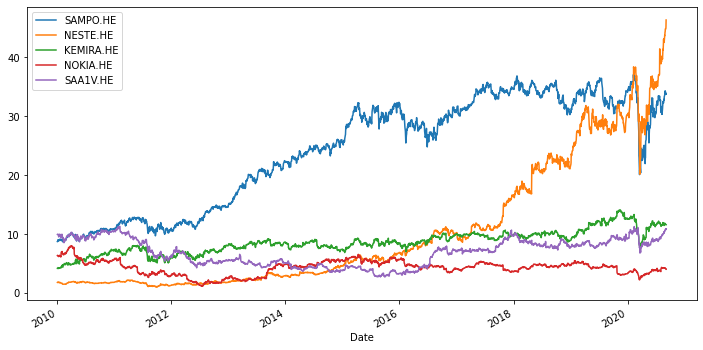

In [19]:
stocks.plot(figsize = (12,6))

### Daily returns
First we calculate simple daily returns. Simple daily returns are calculated with the formula
$$\text {daily return} = \frac{\text{stock's adjusted close today}}{\text{stock's adjusted close yesterday}}$$

In [20]:
simple_daily_returns = stocks/stocks.shift(1) - 1
simple_daily_returns.head()

,SAMPO.HE,NESTE.HE,KEMIRA.HE,NOKIA.HE,SAA1V.HE
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.001752,0.011811,0.002830,-0.003776,0.002448
2010-01-07,0.023364,0.016342,0.006585,0.005956,0.003663
2010-01-08,0.015983,0.017612,0.022431,-0.004306,-0.006691
2010-01-11,-0.014044,-0.007524,-0.018282,-0.015135,-0.002449


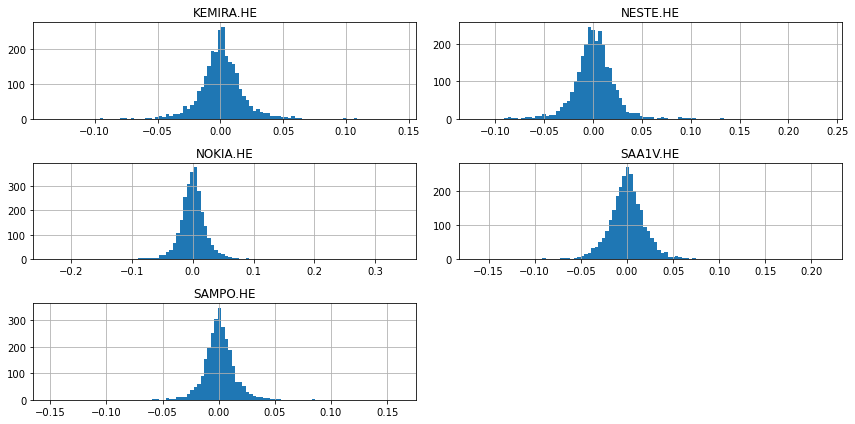

In [24]:
simple_daily_returns.hist(bins=100, figsize = (12,6))
plt.tight_layout();

### Making portfolio
* Do calculations for simple evenly weighted portfolio
* Explain Sharpe ratio cor coparing portfolios

### Optimazation of portfolio
* Use scipy.optimize package to opitmize portfolio